In [1]:
from scripts.pipeline_tools import (
    prepare_data,
    regressor_uncertainty,
    select_unstable_data,
    retrain_regressor,
    uncertainty_change,
    mse_change,
)
from scripts.Models import ITGDatasetDF, load_model, ITGDataset
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader
from scripts.utils import train_keys
import copy
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import yaml 

In [2]:
with open('pipeline_config.yaml') as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)

pretrained = cfg['pretrained']
paths = cfg['data']

In [3]:
train_data, val_data = prepare_data(
    paths['train'], paths['validation'], target_column="efiitg_gb", target_var="itg"
)

scaler = StandardScaler()
scaler.fit_transform(train_data.drop(["itg"], axis=1))

train_dataset = ITGDatasetDF(train_data, target_column="efiitg_gb", target_var="itg")
valid_dataset = ITGDatasetDF(val_data, target_column="efiitg_gb", target_var="itg")

# # TODO: further testing of the scale function
train_dataset.scale(scaler)
valid_dataset.scale(scaler)

In [4]:
# Load pretrained models
print("Loaded the following models:\n")
models = {}
for model in pretrained:
    if pretrained[model]["trained"] == True:
        trained_model = load_model(model, pretrained[model]["save_path"])
        models[model] = trained_model

Loaded the following models:

Model Loaded: ITG_class
Model Loaded: ITG_reg


In [5]:
# TODO: Needs to be the true training samples used!!!
train_sample = train_dataset.sample(10_000)


Iteration: 0


Running classifier selection...



  0%|          | 0/100 [00:00<?, ?it/s]


Stable points: 7552
Misclassified points: 573
Percentage of misclassified points:  5.73%

Dropped 7778 rows

Running MC Dropout on Novel Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 2222
no valid before : 2199776
no valid after : 2201443

Running MC Dropout on Training Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 10000

Retraining regressor...

Training on 10555 points


  0%|          | 0/11 [00:00<?, ?it/s]

Initial loss: 0.5976
Train Step:  0
Loss: 0.9398
Validation Step:  0


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.5330
Train Step:  1
Loss: 0.8348
Train Step:  2
Loss: 0.7440
Train Step:  3
Loss: 0.6642
Train Step:  4
Loss: 0.5988
Train Step:  5
Loss: 0.5421
Train Step:  6
Loss: 0.4952
Train Step:  7
Loss: 0.4532
Train Step:  8
Loss: 0.4272
Train Step:  9
Loss: 0.3942
Train Step:  10
Loss: 0.3698
Validation Step:  10


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2563
Train Step:  11
Loss: 0.3424
Train Step:  12
Loss: 0.3255
Train Step:  13
Loss: 0.3069
Train Step:  14
Loss: 0.2923
Train Step:  15
Loss: 0.2828
Train Step:  16
Loss: 0.2712
Train Step:  17
Loss: 0.2685
Train Step:  18
Loss: 0.2602
Train Step:  19
Loss: 0.2519
Train Step:  20
Loss: 0.2419
Validation Step:  20


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2026
Train Step:  21
Loss: 0.2391
Train Step:  22
Loss: 0.2364
Train Step:  23
Loss: 0.2293
Train Step:  24
Loss: 0.2238

Running MC Dropout on Novel Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 2222

Running MC Dropout on Training Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 10000

Novel Data Uncertainty changes...

 Decreased 74.775% Increased: 25.225 % No Change: 0.000 
Initial Average Uncertainty: 0.3851, Final Average Uncertainty: 0.3124

Training Data Uncertainty changes...

 Decreased 60.240% Increased: 39.760 % No Change: 0.000 
Initial Average Uncertainty: 0.0793, Final Average Uncertainty: 0.0713

Change in MSE for novel dataset: 0.2504


Change in MSE for train dataset: 0.0338


Iteration: 1


Running classifier selection...



  0%|          | 0/100 [00:00<?, ?it/s]


Stable points: 7412
Misclassified points: 544
Percentage of misclassified points:  5.44%

Dropped 7639 rows

Running MC Dropout on Novel Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 2361
no valid before : 2191443
no valid after : 2193214

Running MC Dropout on Training Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 10555

Retraining regressor...

Training on 11145 points


  0%|          | 0/11 [00:00<?, ?it/s]

Initial loss: 0.6775
Train Step:  0
Loss: 1.3858
Validation Step:  0


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.6333
Train Step:  1
Loss: 1.2752
Train Step:  2
Loss: 1.1883
Train Step:  3
Loss: 1.1106
Train Step:  4
Loss: 1.0455
Train Step:  5
Loss: 0.9868
Train Step:  6
Loss: 0.9322
Train Step:  7
Loss: 0.8777
Train Step:  8
Loss: 0.8329
Train Step:  9
Loss: 0.7886
Train Step:  10
Loss: 0.7399
Validation Step:  10


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.4577
Train Step:  11
Loss: 0.6900
Train Step:  12
Loss: 0.6442
Train Step:  13
Loss: 0.6190
Train Step:  14
Loss: 0.5779
Train Step:  15
Loss: 0.5483
Train Step:  16
Loss: 0.5221
Train Step:  17
Loss: 0.5023
Train Step:  18
Loss: 0.4776
Train Step:  19
Loss: 0.4569
Train Step:  20
Loss: 0.4448
Validation Step:  20


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.3167
Train Step:  21
Loss: 0.4321
Train Step:  22
Loss: 0.4154
Train Step:  23
Loss: 0.3929
Train Step:  24
Loss: 0.3855
Train Step:  25
Loss: 0.3699
Train Step:  26
Loss: 0.3600
Train Step:  27
Loss: 0.3445
Train Step:  28
Loss: 0.3459
Train Step:  29
Loss: 0.3298
Train Step:  30
Loss: 0.3277
Validation Step:  30


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2363
Train Step:  31
Loss: 0.3257
Train Step:  32
Loss: 0.3216
Train Step:  33
Loss: 0.3130
Train Step:  34
Loss: 0.3084
Train Step:  35
Loss: 0.3030
Train Step:  36
Loss: 0.2934
Train Step:  37
Loss: 0.2911
Train Step:  38
Loss: 0.2800
Train Step:  39
Loss: 0.2791
Train Step:  40
Loss: 0.2782
Validation Step:  40


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2030
Train Step:  41
Loss: 0.2823
Train Step:  42
Loss: 0.2711
Train Step:  43
Loss: 0.2729
Train Step:  44
Loss: 0.2694
Train Step:  45
Loss: 0.2673
Train Step:  46
Loss: 0.2659
Train Step:  47
Loss: 0.2571
Train Step:  48
Loss: 0.2636
Train Step:  49
Loss: 0.2498

Running MC Dropout on Novel Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 2361

Running MC Dropout on Training Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 10555

Novel Data Uncertainty changes...

 Decreased 58.475% Increased: 41.525 % No Change: 0.000 
Initial Average Uncertainty: 0.3461, Final Average Uncertainty: 0.3260

Training Data Uncertainty changes...

 Decreased 28.735% Increased: 71.265 % No Change: 0.000 
Initial Average Uncertainty: 0.0841, Final Average Uncertainty: 0.0928

Change in MSE for novel dataset: -0.1570


Change in MSE for train dataset: 0.0012


Iteration: 2


Running classifier selection...



  0%|          | 0/100 [00:00<?, ?it/s]


Stable points: 7428
Misclassified points: 536
Percentage of misclassified points:  5.36%

Dropped 7652 rows

Running MC Dropout on Novel Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 2348
no valid before : 2183214
no valid after : 2184975

Running MC Dropout on Training Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 11145

Retraining regressor...

Training on 11732 points


  0%|          | 0/11 [00:00<?, ?it/s]

Initial loss: 0.7115
Train Step:  0
Loss: 1.7559
Validation Step:  0


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.6560
Train Step:  1
Loss: 1.5742
Train Step:  2
Loss: 1.4389
Train Step:  3
Loss: 1.3343
Train Step:  4
Loss: 1.2542
Train Step:  5
Loss: 1.1984
Train Step:  6
Loss: 1.1484
Train Step:  7
Loss: 1.1149
Train Step:  8
Loss: 1.0735
Train Step:  9
Loss: 1.0339
Train Step:  10
Loss: 0.9764
Validation Step:  10


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.6174
Train Step:  11
Loss: 0.9194
Train Step:  12
Loss: 0.8459
Train Step:  13
Loss: 0.7935
Train Step:  14
Loss: 0.7603
Train Step:  15
Loss: 0.7247
Train Step:  16
Loss: 0.6948
Train Step:  17
Loss: 0.6644
Train Step:  18
Loss: 0.6423
Train Step:  19
Loss: 0.6088
Train Step:  20
Loss: 0.5882
Validation Step:  20


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.4023
Train Step:  21
Loss: 0.5757
Train Step:  22
Loss: 0.5668
Train Step:  23
Loss: 0.5489
Train Step:  24
Loss: 0.5231
Train Step:  25
Loss: 0.5084
Train Step:  26
Loss: 0.4898
Train Step:  27
Loss: 0.4830
Train Step:  28
Loss: 0.4660
Train Step:  29
Loss: 0.4486
Train Step:  30
Loss: 0.4447
Validation Step:  30


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2859
Train Step:  31
Loss: 0.4273
Train Step:  32
Loss: 0.4162
Train Step:  33
Loss: 0.4061
Train Step:  34
Loss: 0.4056
Train Step:  35
Loss: 0.3863
Train Step:  36
Loss: 0.3906
Train Step:  37
Loss: 0.3847
Train Step:  38
Loss: 0.3685
Train Step:  39
Loss: 0.3620
Train Step:  40
Loss: 0.3590
Validation Step:  40


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2563
Train Step:  41
Loss: 0.3542
Train Step:  42
Loss: 0.3545
Train Step:  43
Loss: 0.3426
Train Step:  44
Loss: 0.3420
Train Step:  45
Loss: 0.3383
Train Step:  46
Loss: 0.3352
Train Step:  47
Loss: 0.3258
Train Step:  48
Loss: 0.3271
Train Step:  49
Loss: 0.3252
Train Step:  50
Loss: 0.3266
Validation Step:  50


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2264
Train Step:  51
Loss: 0.3157
Train Step:  52
Loss: 0.3100
Train Step:  53
Loss: 0.3198
Train Step:  54
Loss: 0.3090
Train Step:  55
Loss: 0.3015
Train Step:  56
Loss: 0.3094
Train Step:  57
Loss: 0.3029
Train Step:  58
Loss: 0.2961
Train Step:  59
Loss: 0.3016
Train Step:  60
Loss: 0.2957
Validation Step:  60


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2114
Train Step:  61
Loss: 0.2923
Train Step:  62
Loss: 0.2906
Train Step:  63
Loss: 0.2884
Train Step:  64
Loss: 0.2841
Train Step:  65
Loss: 0.2838
Train Step:  66
Loss: 0.2756
Train Step:  67
Loss: 0.2824
Train Step:  68
Loss: 0.2783
Train Step:  69
Loss: 0.2813
Train Step:  70
Loss: 0.2799
Validation Step:  70


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2044
Train Step:  71
Loss: 0.2726
Train Step:  72
Loss: 0.2709
Train Step:  73
Loss: 0.2764
Train Step:  74
Loss: 0.2691

Running MC Dropout on Novel Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 2348

Running MC Dropout on Training Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 11145

Novel Data Uncertainty changes...

 Decreased 68.825% Increased: 31.175 % No Change: 0.000 
Initial Average Uncertainty: 0.3726, Final Average Uncertainty: 0.3313

Training Data Uncertainty changes...

 Decreased 43.921% Increased: 56.079 % No Change: 0.000 
Initial Average Uncertainty: 0.1053, Final Average Uncertainty: 0.1049

Change in MSE for novel dataset: -0.1112


Change in MSE for train dataset: -0.0093


Iteration: 3


Running classifier selection...



  0%|          | 0/100 [00:00<?, ?it/s]


Stable points: 7338
Misclassified points: 569
Percentage of misclassified points:  5.69%

Dropped 7572 rows

Running MC Dropout on Novel Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 2428
no valid before : 2174975
no valid after : 2176796

Running MC Dropout on Training Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 11732

Retraining regressor...

Training on 12339 points


  0%|          | 0/11 [00:00<?, ?it/s]

Initial loss: 0.7132
Train Step:  0
Loss: 2.0182
Validation Step:  0


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.6464
Train Step:  1
Loss: 1.7641
Train Step:  2
Loss: 1.5704
Train Step:  3
Loss: 1.4427
Train Step:  4
Loss: 1.3580
Train Step:  5
Loss: 1.3103
Train Step:  6
Loss: 1.2797
Train Step:  7
Loss: 1.2500
Train Step:  8
Loss: 1.2243
Train Step:  9
Loss: 1.1769
Train Step:  10
Loss: 1.1237
Validation Step:  10


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.7147
Train Step:  11
Loss: 1.0504
Train Step:  12
Loss: 0.9841
Train Step:  13
Loss: 0.9227
Train Step:  14
Loss: 0.8803
Train Step:  15
Loss: 0.8454
Train Step:  16
Loss: 0.8161
Train Step:  17
Loss: 0.7779
Train Step:  18
Loss: 0.7430
Train Step:  19
Loss: 0.7035
Train Step:  20
Loss: 0.6804
Validation Step:  20


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.4287
Train Step:  21
Loss: 0.6586
Train Step:  22
Loss: 0.6474
Train Step:  23
Loss: 0.6467
Train Step:  24
Loss: 0.6248
Train Step:  25
Loss: 0.5945
Train Step:  26
Loss: 0.5730
Train Step:  27
Loss: 0.5629
Train Step:  28
Loss: 0.5425
Train Step:  29
Loss: 0.5415
Train Step:  30
Loss: 0.5186
Validation Step:  30


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.3073
Train Step:  31
Loss: 0.5027
Train Step:  32
Loss: 0.4803
Train Step:  33
Loss: 0.4790
Train Step:  34
Loss: 0.4679
Train Step:  35
Loss: 0.4522
Train Step:  36
Loss: 0.4428
Train Step:  37
Loss: 0.4360
Train Step:  38
Loss: 0.4319
Train Step:  39
Loss: 0.4141
Train Step:  40
Loss: 0.4119
Validation Step:  40


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2800
Train Step:  41
Loss: 0.4069
Train Step:  42
Loss: 0.4122
Train Step:  43
Loss: 0.3920
Train Step:  44
Loss: 0.3850
Train Step:  45
Loss: 0.3832
Train Step:  46
Loss: 0.3777
Train Step:  47
Loss: 0.3768
Train Step:  48
Loss: 0.3741
Train Step:  49
Loss: 0.3673
Train Step:  50
Loss: 0.3625
Validation Step:  50


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2387
Train Step:  51
Loss: 0.3581
Train Step:  52
Loss: 0.3592
Train Step:  53
Loss: 0.3580
Train Step:  54
Loss: 0.3512
Train Step:  55
Loss: 0.3463
Train Step:  56
Loss: 0.3514
Train Step:  57
Loss: 0.3421
Train Step:  58
Loss: 0.3384
Train Step:  59
Loss: 0.3366
Train Step:  60
Loss: 0.3412
Validation Step:  60


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2250
Train Step:  61
Loss: 0.3314
Train Step:  62
Loss: 0.3345
Train Step:  63
Loss: 0.3317
Train Step:  64
Loss: 0.3215
Train Step:  65
Loss: 0.3231
Train Step:  66
Loss: 0.3221
Train Step:  67
Loss: 0.3222
Train Step:  68
Loss: 0.3193
Train Step:  69
Loss: 0.3105
Train Step:  70
Loss: 0.3191
Validation Step:  70


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2173
Train Step:  71
Loss: 0.3164
Train Step:  72
Loss: 0.3200
Train Step:  73
Loss: 0.3143
Train Step:  74
Loss: 0.3167
Train Step:  75
Loss: 0.3070
Train Step:  76
Loss: 0.3029
Train Step:  77
Loss: 0.2986
Train Step:  78
Loss: 0.3026
Train Step:  79
Loss: 0.3048
Train Step:  80
Loss: 0.2985
Validation Step:  80


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2087
Train Step:  81
Loss: 0.2993
Train Step:  82
Loss: 0.3033
Train Step:  83
Loss: 0.2982
Train Step:  84
Loss: 0.2936
Train Step:  85
Loss: 0.2934
Train Step:  86
Loss: 0.2961
Train Step:  87
Loss: 0.2838
Train Step:  88
Loss: 0.2919
Train Step:  89
Loss: 0.2889
Train Step:  90
Loss: 0.2903
Validation Step:  90


  0%|          | 0/11 [00:00<?, ?it/s]

Test loss: 0.2014
Train Step:  91
Loss: 0.2904
Train Step:  92
Loss: 0.2900
Train Step:  93
Loss: 0.2908
Train Step:  94
Loss: 0.2852
Train Step:  95
Loss: 0.2832
Train Step:  96
Loss: 0.2813
Train Step:  97
Loss: 0.2802
Train Step:  98
Loss: 0.2757
Train Step:  99
Loss: 0.2777

Running MC Dropout on Novel Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 2428

Running MC Dropout on Training Data....



  0%|          | 0/15 [00:00<?, ?it/s]


Number of points passed for MC dropout: 11732

Novel Data Uncertainty changes...

 Decreased 69.357% Increased: 30.643 % No Change: 0.000 
Initial Average Uncertainty: 0.3625, Final Average Uncertainty: 0.3199

Training Data Uncertainty changes...

 Decreased 40.351% Increased: 59.649 % No Change: 0.000 
Initial Average Uncertainty: 0.1165, Final Average Uncertainty: 0.1183

Change in MSE for novel dataset: -0.2192


Change in MSE for train dataset: -0.0104



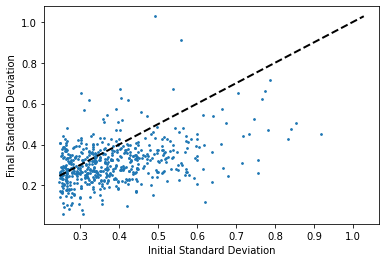

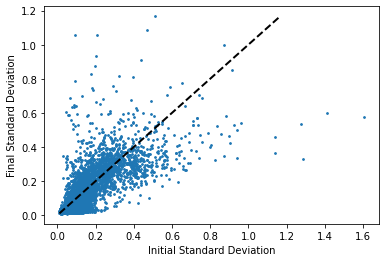

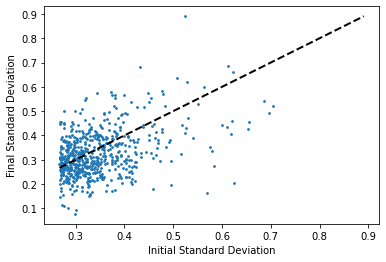

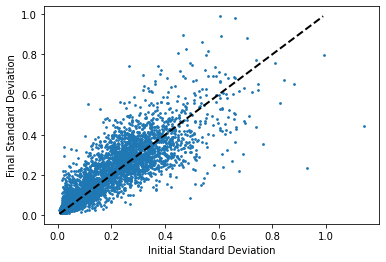

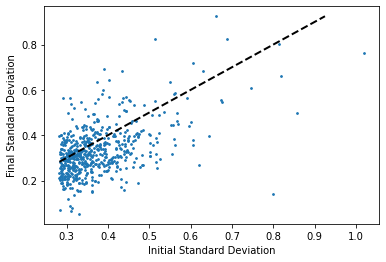

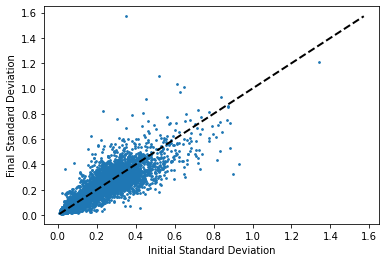

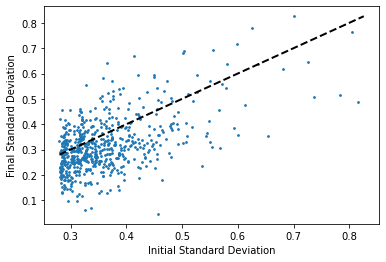

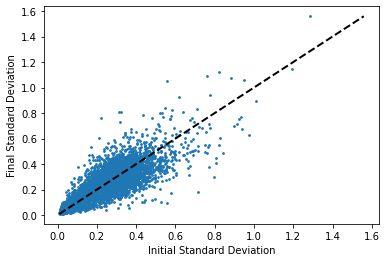

In [6]:
init_epoch = 25
iterations = 4
train_losses = []
test_losses = []
for i in range(iterations):
    print(f"\nIteration: {i}\n")
    valid_sample = valid_dataset.sample(10_000)

    # remove the sampled data points from the dataset
    valid_dataset.remove(valid_sample.data.index)

    select_unstable_data(valid_sample, batch_size=100, classifier=models["ITG_class"])

    uncertain_datset, uncert_before, data_idx = regressor_uncertainty(
    valid_sample, models["ITG_reg"], n_runs=15, keep=0.25,valid_dataset=valid_dataset
)
    train_sample_origin, train_uncert_before, train_uncert_idx = regressor_uncertainty(
        train_sample, models["ITG_reg"], n_runs=15,train_data=True,
        )

    train_sample.add(uncertain_datset)

    uncertain_loader = DataLoader(train_sample, batch_size=len(train_sample), shuffle=True)

    prediction_before, prediction_idx_order = models["ITG_reg"].predict(uncertain_loader)

    # Switching validation dataset to numpy arrays to see if it is quicker
    x_array = valid_dataset.data[train_keys].values
    y_array = valid_dataset.data["itg"].values
    z_array = valid_dataset.data["efiitg_gb"].values
    dataset_numpy = ITGDataset(x_array, y_array, z_array)
    valid_loader = DataLoader(
        dataset_numpy, batch_size=int(0.1 * len(y_array)), shuffle=True
    )

    # Retrain Regressor (Further research required)
    epochs = init_epoch * (i+1)
    train_loss, test_loss = retrain_regressor(
        uncertain_loader,
        valid_loader,
        models["ITG_reg"],
        learning_rate=1e-3,
        epochs=epochs,
        validation_step=True,
        mode="shrink_perturb",
    )

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    prediction_after,_ = models["ITG_reg"].predict(uncertain_loader, prediction_idx_order)

    _, uncert_after,_ = regressor_uncertainty(valid_sample, models["ITG_reg"], n_runs=15, keep=0.25, order_idx=data_idx)
    _, train_uncert_after,_ = regressor_uncertainty(train_sample_origin, models["ITG_reg"], n_runs=15,order_idx=train_uncert_idx, train_data=True)
   
    print("\nNovel Data Uncertainty changes...\n")
    uncertainty_change(x=uncert_before, y=uncert_after);

    print("\nTraining Data Uncertainty changes...\n")
    uncertainty_change(x=train_uncert_before, y=train_uncert_after);
    
    mse_change(prediction_before, prediction_after,prediction_idx_order,data_idx, uncertain_loader,[uncert_before, uncert_after])

    mse_change(
    prediction_before,
    prediction_after,
    prediction_idx_order,
    train_uncert_idx,
    uncertain_loader,
    uncertainties=[train_uncert_before, train_uncert_after],
    data="train"
     )

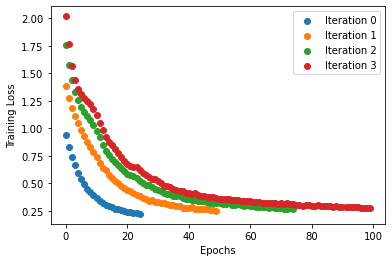

In [9]:
plt.figure()
for i in range(len(train_losses)):
    plt.scatter(np.arange(0,len(train_losses[i])), train_losses[i], label =f"Iteration {i}");
    plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Training Loss");
plt.savefig("SP_training_loss.png", dpi = 300)

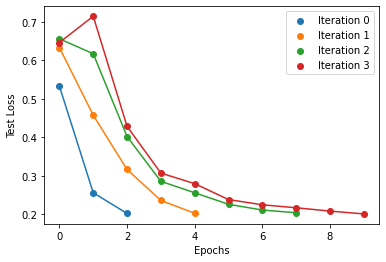

In [10]:
plt.figure()
for i in range(len(test_losses)):
    plt.plot(np.arange(0,len(test_losses[i])), test_losses[i]);
    plt.scatter(np.arange(0,len(test_losses[i])), test_losses[i], label = f"Iteration {i}");
    
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Test Loss");
plt.savefig("SP_test_loss.png", dpi = 300)